In [1]:
import pandas as pd

In [2]:
from sklearn.neighbors import LocalOutlierFactor
df = pd.read_csv('Placement_data_full_class.xls')

In [3]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [7]:
# checking is there nan value or not 
df['degree_t'].isna().sum()

0

In [8]:
df.sl_no.isna().sum()

0

In [9]:
# counting Nan value for each column
print(f"For sl_no: {df.sl_no.isna().sum()}")
print(f"For ssc_p: {df.ssc_p.isna().sum()}")
print(f"For hsc_p: {df.hsc_p.isna().sum()}")
print(f"For degree_p: {df.degree_p.isna().sum()}")
print(f"For etest_p: {df.etest_p.isna().sum()}")
print(f"For mba_p: {df.mba_p.isna().sum()}")
print(f"For salary: {df.salary.isna().sum()}")

For sl_no: 0
For ssc_p: 0
For hsc_p: 0
For degree_p: 0
For etest_p: 0
For mba_p: 0
For salary: 67


In [11]:
# we have 67 Nan values and for that we drop thoes, now we have 148 values in salary
# so we need to re index it and we took only two features (degree_p, salary)
df=df.dropna()[['degree_p','salary']]
df.index=[i for i in range(0,148)]#reindexing | change accordingle to reset index of df

In [12]:
print(f"For salary: {df.salary.isna().sum()}")

For salary: 0


In [13]:
len(df.salary)

148

In [22]:
from sklearn.preprocessing import StandardScaler
from collections import Counter

# defining data scaler  
stscaler = StandardScaler().fit(df)

# data scaling
df = pd.DataFrame(stscaler.transform(df))

# defining local outlier factor 
clf = LocalOutlierFactor(n_neighbors=25, contamination=.1)

# get the predicted results 
y_pred = clf.fit_predict(df)

# LOF score 
LOF_Scores = clf.negative_outlier_factor_

# making a series for y pred
LOF_pred=pd.Series(y_pred)

# determiming outliers 
outliers=df[LOF_pred==-1]

print(Counter(LOF_pred))

outliers

Counter({1: 133, -1: 15})


,0,1
13,2.502984,1.120284
26,-0.729760,1.313539
33,0.501762,1.732258
47,-1.037640,0.765983
53,-0.575820,2.269078
66,-0.575820,1.410167
73,2.195104,-0.951839
83,-0.637396,6.993089
93,-1.037640,0.765983
108,-1.653401,4.308992


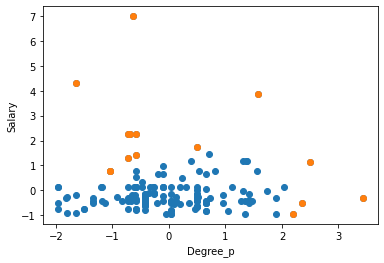

In [25]:
import matplotlib.pyplot as plt
plt.scatter(df[0],df[1])
plt.scatter(outliers[0],outliers[1])
plt.xlabel("Degree_p")
plt.ylabel("Salary")
plt.show()

In [26]:
# defining data scaler  
stscaler = StandardScaler().fit(df)

# data scaling
df = pd.DataFrame(stscaler.transform(df))

# defining local outlier factor 
clf = LocalOutlierFactor(n_neighbors=25, contamination=.08)

# get the predicted results 
y_pred = clf.fit_predict(df)

# LOF score 
LOF_Scores = clf.negative_outlier_factor_

# making a series for y pred
LOF_pred=pd.Series(y_pred)

# determiming outliers 
outliers=df[LOF_pred==-1]

print(Counter(LOF_pred))

outliers

Counter({1: 136, -1: 12})


,0,1
13,2.502984,1.120284
26,-0.729760,1.313539
53,-0.575820,2.269078
66,-0.575820,1.410167
73,2.195104,-0.951839
83,-0.637396,6.993089
108,-1.653401,4.308992
110,2.349044,-0.522383
117,-0.729760,2.269078
122,-0.688196,2.269078


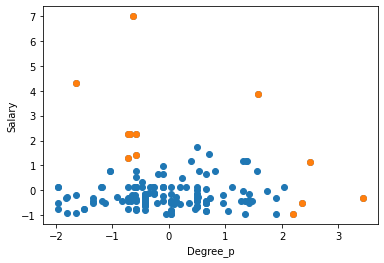

In [27]:
plt.scatter(df[0],df[1])
plt.scatter(outliers[0],outliers[1])
plt.xlabel("Degree_p")
plt.ylabel("Salary")
plt.show()

In [29]:
# defining data scaler  
stscaler = StandardScaler().fit(df)

# data scaling
df = pd.DataFrame(stscaler.transform(df))

# defining local outlier factor 
clf = LocalOutlierFactor(n_neighbors=25, contamination=.15)

# get the predicted results 
y_pred = clf.fit_predict(df)

# LOF score 
LOF_Scores = clf.negative_outlier_factor_

# making a series for y pred
LOF_pred=pd.Series(y_pred)

# determiming outliers 
outliers=df[LOF_pred==-1]

print(Counter(LOF_pred))

outliers

Counter({1: 125, -1: 23})


,0,1
3,0.701884,1.463849
13,2.502984,1.120284
26,-0.729760,1.313539
29,1.887223,-0.951839
33,0.501762,1.732258
47,-1.037640,0.765983
53,-0.575820,2.269078
59,1.302251,1.195439
66,-0.575820,1.410167
73,2.195104,-0.951839


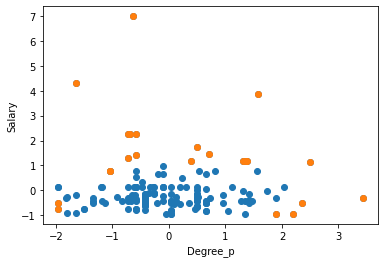

In [30]:
plt.scatter(df[0],df[1])
plt.scatter(outliers[0],outliers[1])
plt.xlabel("Degree_p")
plt.ylabel("Salary")
plt.show()